Now lets do some analysis and visualization to our cleaned data :)

# **Data Analysis**

In [1]:
import pandas as pd, numpy as np, re
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_excel('/content/Job_cleaned.xlsx')
df.head()

,job_title,company,published_time,work_location,city,job_description,experience_level,experience_years,program,shift
0,Data Analysis Manager,WUZZUF,4 days ago,Maadi,Cairo,ITSoftware-Development-AnalystResearch-Enginee...,Undefined,7 - 15,Hybrid,Full Time
1,Data Entry Clerk,Confidential,22 hours ago,Downtown,Cairo,Administration-Customer-ServiceSupport-Marketi...,Experienced,1 - 20,Remote,Full Time
2,Data Entry Clerk,Choozle,6 days ago,Barka',Oman,Administration-WritingEditorial-Data-Entry-Dat...,Experienced,2 - 2,On-site,Full Time
3,Data Entry Specialist,British House,7 days ago,Mokattam,Cairo,Administration-Customer-ServiceSupport-Analyst...,Entry Level,1 - 3,On-site,Full Time
4,Data Entry,Global Tires Trading and Distribution,10 days ago,New Cairo,Cairo,AccountingFinance-Administration-Customer-Serv...,Entry Level,0 - 1,On-site,Full Time


**Basic Statistics**

In [3]:
job_title_counts = df['job_title'].value_counts()
print("Top 10 Job Titles:")
print(job_title_counts.head(10))

company_counts = df['company'].value_counts()
print("\nTop 10 Companies:")
print(company_counts.head(10))

job_types = df['shift'].value_counts()
print("\nJob Types:")
print(job_types)

program_counts = df['program'].value_counts()
print("\nProgram:")
print(program_counts)

Top 10 Job Titles:
job_title
Accountant                 73
General Accountant         27
Cost Accountant            20
Social Media Specialist    18
Marketing Specialist       18
Accounting Manager         16
Senior Accountant          14
Media Buyer                13
Full Stack Developer       12
Data Entry Clerk           12
Name: count, dtype: int64

Top 10 Companies:
company
Confidential              254
Intouch CX                 25
ECC Group                  16
Alshaya                    14
GB Corp                    13
Allianz                    12
Cosmos                     11
Axios International        11
Seoudi Supermarket         11
Avetti Commerce FZCO       11
Name: count, dtype: int64

Job Types:
shift
Full Time     2278
Internship      34
Part Time       13
Freelance        8
Name: count, dtype: int64

Program:
program
On-site    2037
Hybrid      160
Remote      136
Name: count, dtype: int64


* **Top Job Titles:**
The job market seems heavily tilted towards accounting-related roles, with "Accountant" alone taking the lead by a huge margin (73 jobs)

* **Top Companies:**
A striking observation is the dominance of "Confidential" job postings (254 jobs), suggesting many employers prefer to stay anonymous. Among named companies, Intouch CX (25 jobs), ECC Group (16 jobs) lead, indicating active hiring or large-scale operations. The rest, like Alshaya and GB Corp, show moderate hiring.

* **Job Types:**
The overwhelming majority of opportunities are Full-Time (2278 jobs), reflecting the market's preference for permanent staffing.
Internships (34 jobs), Part-Time (13 jobs), and Freelance (8 jobs) roles are much rarer, highlighting limited flexibility for non-traditional employment seekers.

*   **Program:** This suggests that the Egyptian job market (where the data is focused) still heavily favors traditional on-site work arrangements. While there's some presence of hybrid and remote options, they remain relatively uncommon compared to the traditional model.

In [ ]:
locations_counts = df['work_location'].value_counts()
print("Top 10 Locations:")
print(locations_counts.head(10))

city_counts = df['city'].value_counts()
print("\nTop 10 Cities:")
print(city_counts.head(10))

Top 10 Locations:
work_location
New Cairo               287
Cairo                   286
Maadi                   199
Nasr City               190
6th of October          190
Heliopolis              115
10th of Ramadan City     88
Sheikh Zayed             84
Sheraton                 72
Obour City               68
Name: count, dtype: int64

Top 10 Cities:
city
Cairo           1458
Giza             478
Alexandria       128
Sharqia           63
Saudi Arabia      26
Monufya           21
Qalubia           20
Port Said         16
Red Sea           13
Suez              10
Name: count, dtype: int64


The job market is highly concentrated in Cairo, with New Cairo leading the top locations, followed closely by key business districts like Maadi, Nasr City, and 6th of October.

Cairo city itself overwhelmingly dominates the top cities list with over 1458 job postings, far ahead of Giza (478) and Alexandria (128). Other cities like Sharqia, Monufya, Qalubia, and Port Said show some hiring activity but on a much smaller scale.
Notably, a few international postings appear in Saudi Arabia as well.


Overall Observation:
The data highlights that most opportunities are heavily centralized around Cairo's urban and business hubs, with limited but steady openings in nearby governorates and occasional opportunities abroad.

In [ ]:
# Experience Statistics
df[['min_exp','max_exp']] = df['experience_years']\
    .str.extract(r'(\d+)\s*-\s*(\d+)')\
    .astype(float)
df['avg_exp'] = df[['min_exp','max_exp']].mean(axis=1)
df['avg_exp'].describe()

,avg_exp
count,2119.000000
mean,4.823738
std,3.261206
min,0.500000
25%,2.500000
50%,4.000000
75%,6.000000
max,19.000000


In [ ]:
exp_level_counts = df['experience_level'].value_counts()
exp_level_counts

,count
experience_level,
Experienced,1473
Entry Level,466
Undefined,346
Senior Management,48




* **Average Experience:**

>  The average required experience across postings is around 4.8 (4-5 years), with most jobs asking between 2.5 to 6 years of experience. The minimum is half a year, and the maximum reaches 19 years, indicating a wide range of seniority levels depending on the role.



* **Experience Levels:**


> Most jobs target "Experienced" candidates (1473 postings), followed by a decent number of "Entry Level" roles (466). Senior Management opportunities are rare (48), and a noticeable portion of jobs (346) did not clearly define the experience level.

The experience level breakdown suggests that the market favors those with prior experience, while also offering opportunities for newcomers.



In [ ]:
# Top Skills & Tools

# 1. Pre‑clean the descriptions
def clean_text(s):
    # split CamelCase
    s = re.sub(r'([a-z])([A-Z])', r'\1 \2', s)
    # replace any non‑alphanumeric with space
    s = re.sub(r'[^A-Za-z0-9]+', ' ', s)
    return s.lower()

docs = df['job_description'].fillna('').map(clean_text)

# 2. Vectorize unigrams & bigrams, filter noise
vectorizer = CountVectorizer(
    ngram_range=(1,2),
    min_df=20,
    stop_words=['skills','business','management','development']
)
X = vectorizer.fit_transform(docs)

# 3. Sum & sort
terms = vectorizer.get_feature_names_out()
freq = np.array(X.sum(axis=0)).ravel()
ngram_counts = pd.Series(freq, index=terms).sort_values(ascending=False)

# 4. Peek at top 20
ngram_counts.head(20)

,0
engineering,1279
sales,940
marketing,934
accounting,852
finance,689
communication,676
customer,568
administration,562
technology,470
accounting finance,467


###**Process Overview**

1. **Text Preprocessing**:  
   We cleaned the data by splitting multi-word skills (e.g., "accounting-finance" to "accounting finance") and removing unnecessary characters. This helped ensure skills were identified correctly.

2. **Vectorization**:  
   Using **CountVectorizer**, we transformed the text into a count of skills, including both single words and two-word phrases (bigrams). We filtered out rare terms that appeared in fewer than 20 job descriptions.

3. **Aggregation**:  
   We summed the counts of each skill and sorted them by frequency to identify the most common skills across all job descriptions.


### **Key Insights**

- **Top Skills**:  
   The most common skills are **Engineering** (1279 occurrences), **Sales** (940), and **Marketing** (934), highlighting the demand for technical and business development skills.
  
- **Important Skills**:  
   **Accounting** (852) and **Finance** (689) are also highly in demand, with **Communication** (676) being a key soft skill.

This approach helped us identify trends in the job market and highlight which skills are most sought after.

# **Data Visualization**

In [ ]:
import matplotlib.pyplot as plt, seaborn as sns
from matplotlib import cm
from wordcloud import WordCloud
import plotly.express as px
from datetime import datetime, timedelta
from collections import Counter

In [ ]:
# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

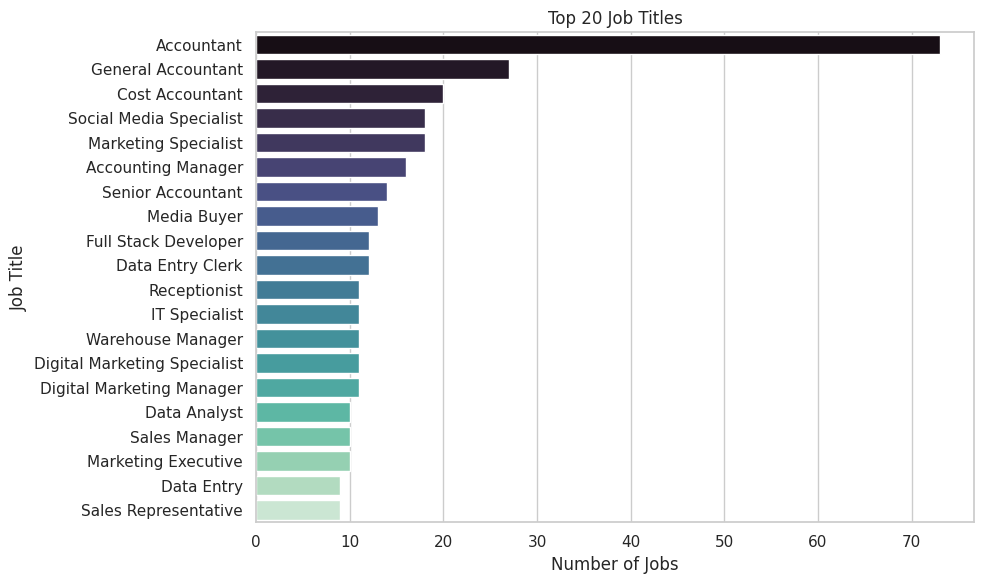

In [ ]:
# Top job titles
plt.figure()
sns.barplot(x=job_title_counts.head(20).values,
            y=job_title_counts.head(20).index,
            hue=job_title_counts.head(20).index,
            palette='mako',
            dodge=False,
            legend=False
)
plt.title('Top 20 Job Titles')
plt.xlabel('Number of Jobs')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

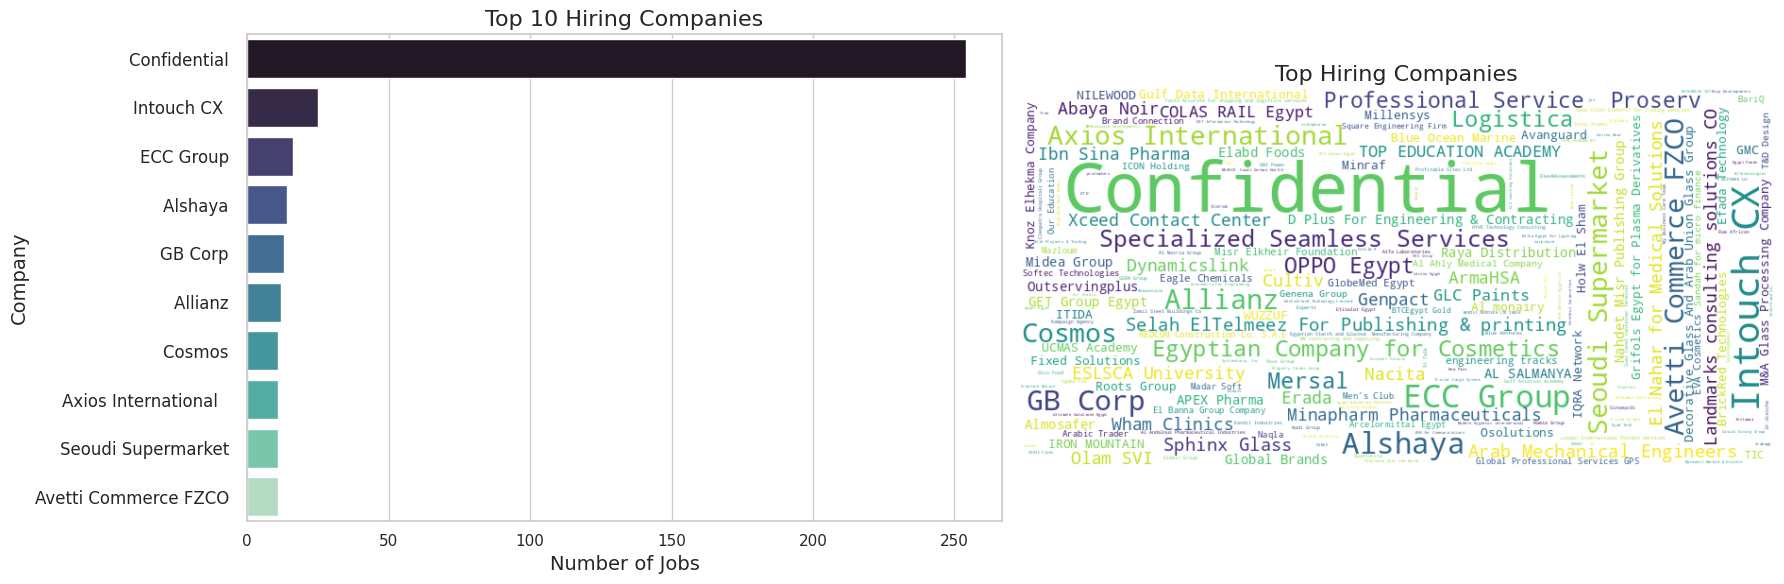

In [ ]:
# Top hiring companies

top_companies = company_counts.head(10)
company_freq  = df['company'].value_counts().to_dict()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# 1) Horizontal bar chart of top 10 hiring companies
sns.barplot(
    x=top_companies.values,
    y=top_companies.index,
    hue=top_companies.index,
    palette='mako',
    dodge=False,
    legend=False,
    ax=ax1
)
ax1.set_title('Top 10 Hiring Companies', fontsize=16)
ax1.set_xlabel('Number of Jobs', fontsize=14)
ax1.set_ylabel('Company', fontsize=14)
ax1.tick_params(axis='y', labelsize=12)


# 2) Word cloud of company frequencies
wc = WordCloud(width=800, height=400, background_color='white')\
     .generate_from_frequencies(company_freq)
ax2.imshow(wc, interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Top Hiring Companies', fontsize=16)

plt.tight_layout()
plt.show()

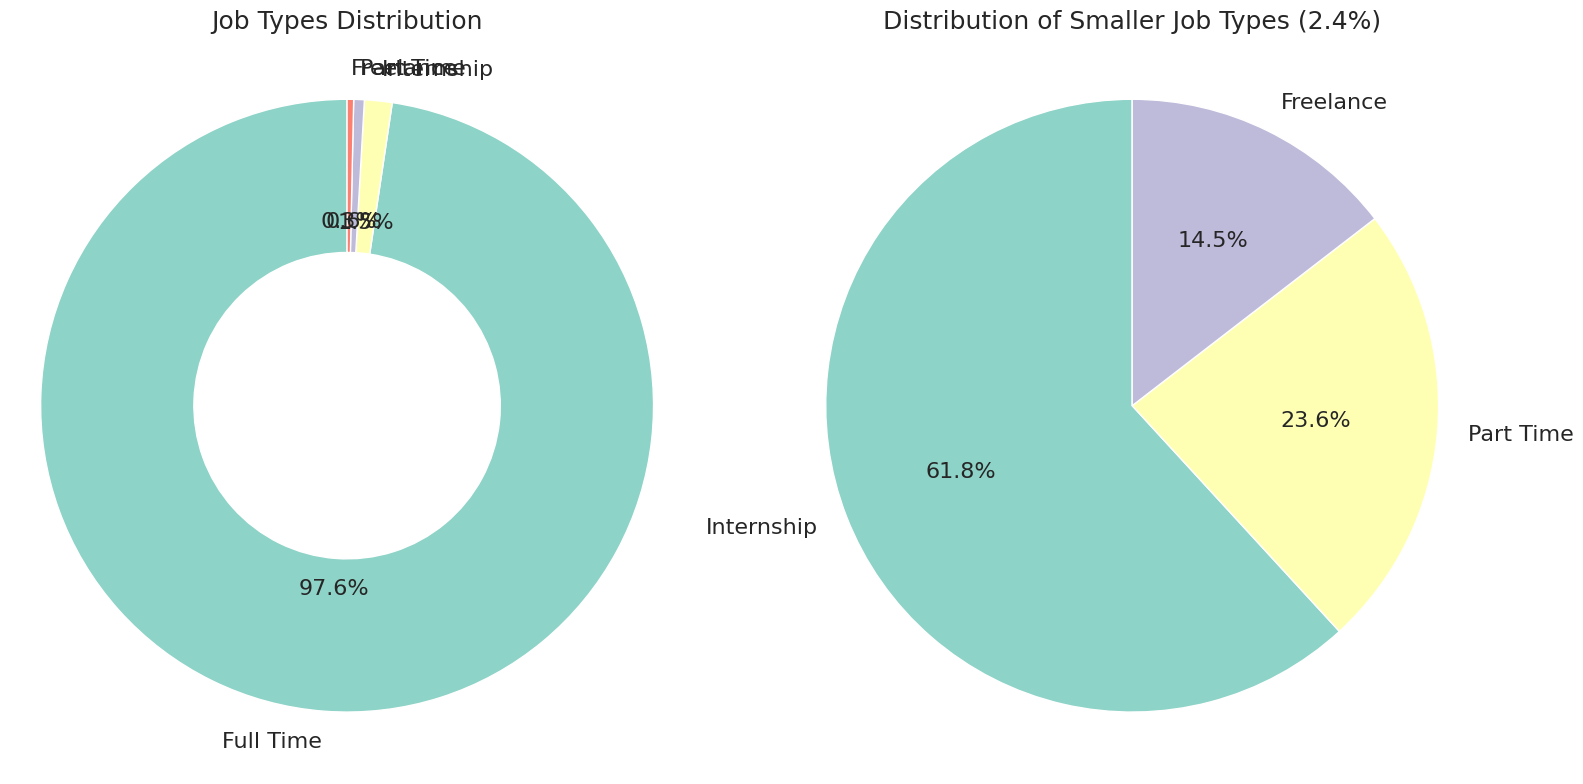

In [ ]:
# Job types distribution

colors = sns.color_palette("Set3", n_colors=len(job_types))
small_categories = job_types[job_types < job_types.max()]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# 1) Main Job Types Distribution
ax1.pie(
    job_types,
    labels=job_types.index,
    startangle=90,
    autopct='%1.1f%%',
    wedgeprops={'width': 0.5},
    colors=colors,
    textprops={'fontsize': 16}
)
ax1.set_title("Job Types Distribution", fontsize=18)
ax1.axis('equal')

# 2) Smaller Job Types Only
ax2.pie(
    small_categories,
    labels=small_categories.index,
    startangle=90,
    autopct='%1.1f%%',
    colors=colors,
    textprops={'fontsize': 16}
)
ax2.set_title('Distribution of Smaller Job Types (2.4%)', fontsize=18)
ax2.axis('equal')

plt.tight_layout()
plt.show()

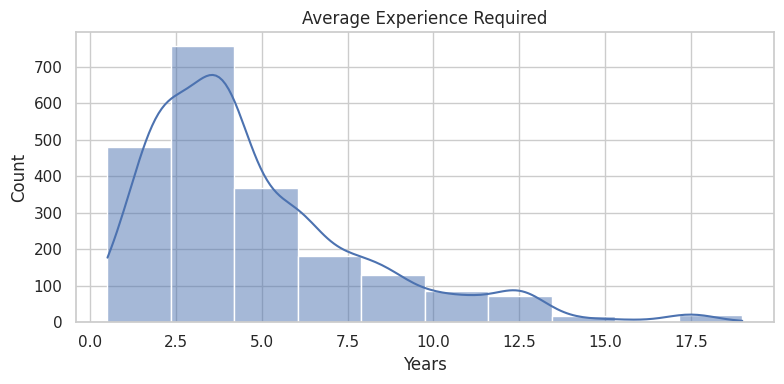

In [ ]:
# Average Experience
plt.figure(figsize=(8,4))
sns.histplot(df['avg_exp'], bins=10, kde=True)
plt.title('Average Experience Required')
plt.xlabel('Years')
plt.tight_layout()
plt.show()

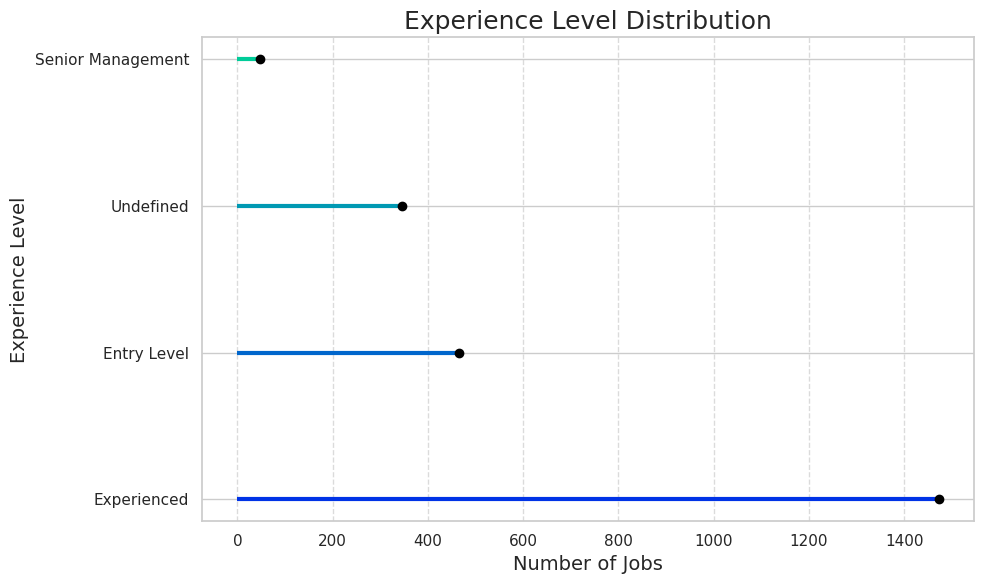

In [ ]:
# Experience by Level
plt.figure()
colors = sns.color_palette('winter', len(exp_level_counts))

plt.hlines(y=exp_level_counts.index,
           xmin=0, xmax=exp_level_counts.values,
           color=colors, linewidth=3)
plt.plot(exp_level_counts.values,
         exp_level_counts.index,
         "o", color='black')

plt.title('Experience Level Distribution', fontsize=18)
plt.xlabel('Number of Jobs', fontsize=14)
plt.ylabel('Experience Level', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

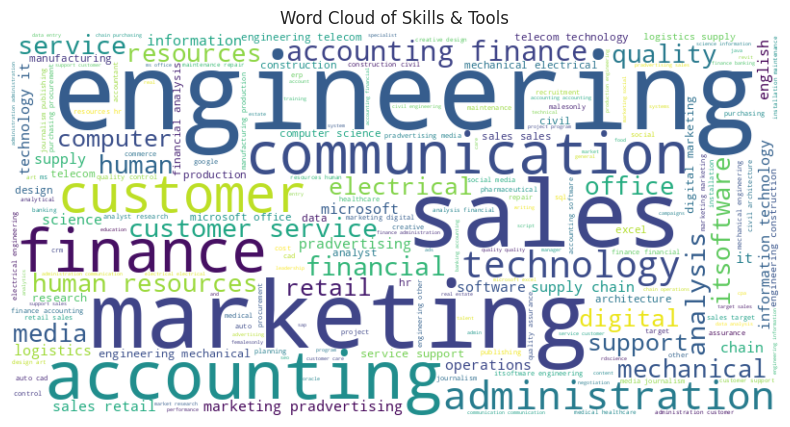

In [ ]:
# Skills & Tools
wc = WordCloud(width=800, height=400, background_color='white')\
     .generate_from_frequencies(ngram_counts)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Skills & Tools')
plt.show()

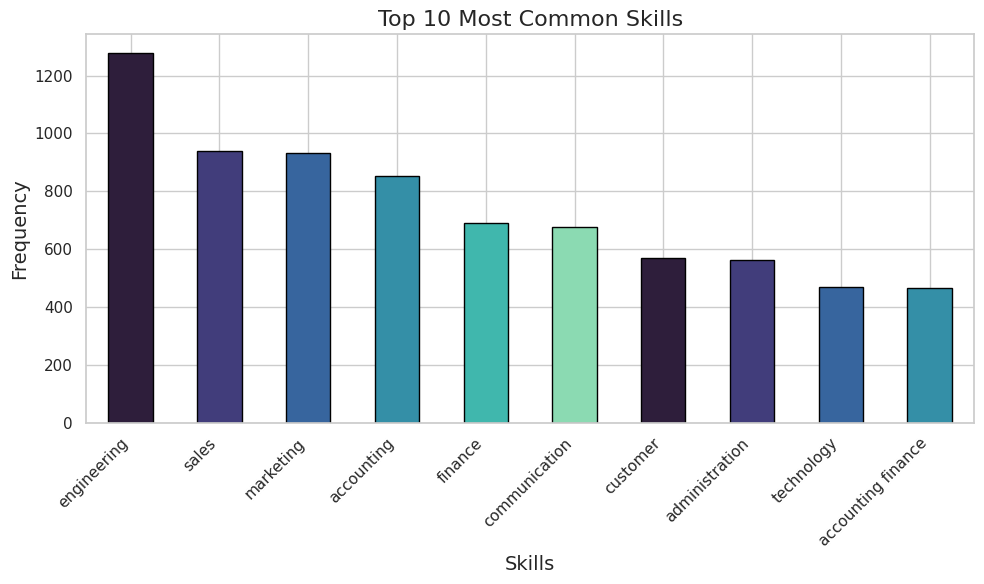

In [ ]:
colors = sns.color_palette("mako")
top_skills = ngram_counts.head(10)

plt.figure(figsize=(10, 6))
top_skills.plot(kind='bar',
                color= colors,
                edgecolor='black')
plt.title('Top 10 Most Common Skills', fontsize=16)
plt.xlabel('Skills', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Jobs by City
city_df = city_counts.rename_axis('city').reset_index(name='count')
fig = px.treemap(city_df, path=['city'], values='count',
                 color='count', color_continuous_scale='Blues')
fig.update_coloraxes(colorbar_title='Count')
fig.show()

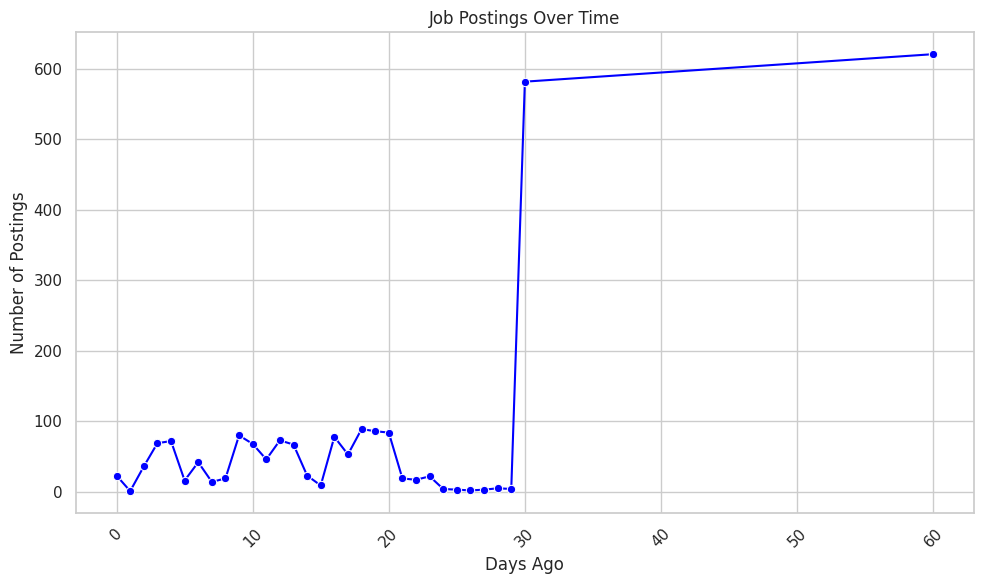

In [ ]:
# Posting frequency over time

def extract_days(text):
    try:
        if 'day' in text:
            return int(text.split()[0])
        elif 'month' in text:
            return int(text.split()[0]) * 30
        elif 'hour' in text:
            return 0
        else:
            return np.nan
    except:
        return np.nan

df['days_ago'] = df['published_time'].apply(extract_days)
posting_trend = df['days_ago'].value_counts().sort_index()

plt.figure()
sns.lineplot(x=posting_trend.index, y=posting_trend.values, marker='o', color='blue')
plt.title("Job Postings Over Time")
plt.xlabel("Days Ago")
plt.ylabel("Number of Postings")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### > **warning: a breathtaking plot is coming**



In [ ]:
import plotly.graph_objects as go

top5_locations = df['work_location'].value_counts().nlargest(5).index
filtered_df = df[df['work_location'].isin(top5_locations)]

# Create labels lists
locations = filtered_df['work_location'].unique().tolist()
programs = filtered_df['program'].unique().tolist()
shifts = filtered_df['shift'].unique().tolist()

labels = locations + programs + shifts

# Create mapping for indices
label_to_index = {label: idx for idx, label in enumerate(labels)}

# Create source and target links
source = []
target = []
value = []

# From Location to Program
for loc in locations:
    for prog in programs:
        count = filtered_df[(filtered_df['work_location'] == loc) & (filtered_df['program'] == prog)].shape[0]
        if count > 0:
            source.append(label_to_index[loc])
            target.append(label_to_index[prog])
            value.append(count)

# From Program to Shift
for prog in programs:
    for shift in shifts:
        count = filtered_df[(filtered_df['program'] == prog) & (filtered_df['shift'] == shift)].shape[0]
        if count > 0:
            source.append(label_to_index[prog])
            target.append(label_to_index[shift])
            value.append(count)

# Build Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    ))])

fig.update_layout(title_text="Flow from Location ➔ Program ➔ Job Type", font_size=14)
fig.show()

We've successfully completed our analysis and visualizations, gaining valuable insights along the way.

Now, it's time to store our data and move on to building the Streamlit app!